**Task-1** : Titanic Survival Prediciton

**Author** : Pranav Rajyaguru

**Batch** : June 2024

**Domain** : Data Science

**Goal** : To build a model that predicts whether a
passenger on the Titanic survived or not.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

In [ ]:
titanic = pd.read_csv(r"/content/Titanic-Dataset.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#replacing missing values with mean values
titanic["Age"].fillna(titanic["Age"].mean(),inplace=True)

In [ ]:
#fixing embarked
titanic["Embarked"].mode()[0]

'S'

In [ ]:
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0],inplace=True)

In [ ]:
#removing missing/null values
titanic = titanic.drop(columns="Cabin",axis=1)

In [ ]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
Survived = titanic['Survived'].value_counts().reset_index()
Survived

,Survived,count
0,0,549
1,1,342


In [ ]:
counts = titanic.groupby(['Survived', 'Sex']).size()
counts

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

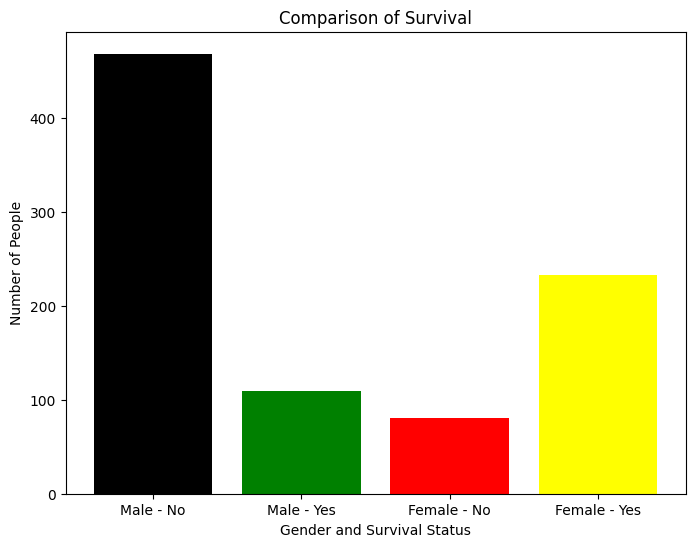

In [ ]:
data = {'Survived': ['Male - No', 'Male - Yes', 'Female - No', 'Female - Yes'],
        'Counts': [counts[0]["male"], counts[1]["male"], counts[0]["female"], counts[1]["female"]]}
Survived = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.bar(Survived['Survived'], Survived['Counts'],color=["black","green","red","yellow"])
plt.xticks(Survived['Survived'])
plt.title('Comparison of Survival')
plt.xlabel('Gender and Survival Status')
plt.ylabel('Number of People')
plt.show()

In [ ]:
titanic.drop(['PassengerId','Name','SibSp','Parch','Ticket','Embarked'],axis='columns',inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [ ]:
inputs = titanic.drop('Survived',axis='columns')
target = titanic['Survived']
sex=pd.get_dummies(inputs.Sex)
sex.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [ ]:
inputs=pd.concat([inputs,sex],axis="columns")
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,False,True
1,1,female,38.0,71.2833,True,False
2,3,female,26.0,7.9250,True,False
3,1,female,35.0,53.1000,True,False
4,3,male,35.0,8.0500,False,True


In [ ]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   Fare    891 non-null    float64
 4   female  891 non-null    bool   
 5   male    891 non-null    bool   
dtypes: bool(2), float64(2), int64(1), object(1)
memory usage: 29.7+ KB


In [ ]:
inputs.isna().sum()

Pclass    0
Sex       0
Age       0
Fare      0
female    0
male      0
dtype: int64

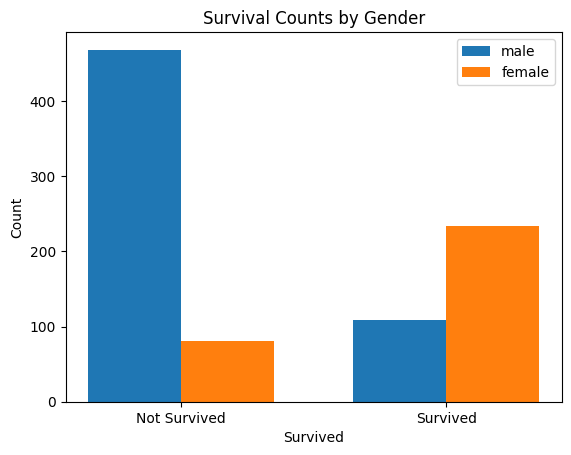

In [ ]:
counts = titanic.groupby(['Survived', 'Sex']).size().unstack().fillna(0)

# Define the bar width
bar_width = 0.35
index = counts.index

# Plotting
fig, ax = plt.subplots()

# Plot bars for each Sex
bar1 = ax.bar(index - bar_width/2, counts['male'], bar_width, label='male')
bar2 = ax.bar(index + bar_width/2, counts['female'], bar_width, label='female')
ax.set_xlabel('Survived')
ax.set_ylabel('Count')
ax.set_title('Survival Counts by Gender')
ax.set_xticks(index)
ax.set_xticklabels(['Not Survived', 'Survived'])
ax.legend()

# Display the plot
plt.show()

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(inputs,target,test_size=0.2)
X_train

,Pclass,Sex,Age,Fare,female,male
371,3,male,18.0,6.4958,False,True
377,1,male,27.0,211.5000,False,True
515,1,male,47.0,34.0208,False,True
795,2,male,39.0,13.0000,False,True
866,2,female,27.0,13.8583,True,False
...,...,...,...,...,...,...
190,2,female,32.0,13.0000,True,False
67,3,male,19.0,8.1583,False,True
496,1,female,54.0,78.2667,True,False
730,1,female,29.0,211.3375,True,False


In [ ]:
X_test

,Pclass,Sex,Age,Fare,female,male
475,1,male,29.699118,52.0000,False,True
655,2,male,24.000000,73.5000,False,True
869,3,male,4.000000,11.1333,False,True
37,3,male,21.000000,8.0500,False,True
502,3,female,29.699118,7.6292,True,False
...,...,...,...,...,...,...
152,3,male,55.500000,8.0500,False,True
341,1,female,24.000000,263.0000,True,False
66,2,female,29.000000,10.5000,True,False
320,3,male,22.000000,7.2500,False,True


In [ ]:
y_train

371    0
377    0
515    0
795    0
866    1
      ..
190    1
67     0
496    1
730    1
261    1
Name: Survived, Length: 712, dtype: int64

In [ ]:
y_test

475    0
655    0
869    1
37     0
502    0
      ..
152    0
341    1
66     1
320    0
384    0
Name: Survived, Length: 179, dtype: int64

In [ ]:
inputs.corr()

ValueError: could not convert string to float: 'male'

In [ ]:
sns.heatmap(inputs.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
predict=model.predict(X_test)
matrices=r2_score(predict,y_test)
matrices